In [1]:
#import modules
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import csv
from pandas.api.types import CategoricalDtype
low_memory = False

In [2]:
#read csv data from the CDC for CA
csv_ca_cdc_path = "./Resources/CA_cases_by_county/cdc_ca_output_data.csv"
ca_covid = pd.read_csv(csv_ca_cdc_path, encoding="utf-8")
ca_covid = pd.DataFrame(ca_covid)
ca_covid = ca_covid.drop(columns=['res_state'])
ca_covid.head()

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,case_month,res_county,age_group,current_status,sex,race,ethnicity
0,2020-12,SONOMA,0 - 17 years,Laboratory-confirmed case,Female,White,Non-Hispanic/Latino
1,2020-12,SACRAMENTO,18 to 49 years,Laboratory-confirmed case,Male,American Indian/Alaska Native,Hispanic/Latino
2,2021-01,SANTA CLARA,0 - 17 years,Laboratory-confirmed case,Female,White,Non-Hispanic/Latino
3,2020-11,SANTA CRUZ,18 to 49 years,Laboratory-confirmed case,Female,White,Non-Hispanic/Latino
4,2020-11,TEHAMA,18 to 49 years,Laboratory-confirmed case,Female,White,Non-Hispanic/Latino


In [3]:
#fill all null resident county values with 'small county' since the CDC does not include
#counties with tiny populations.

ca_covid['res_county'].fillna("SMALL COUNTY", inplace = True)
ca_covid['res_county'].unique()

array(['SONOMA', 'SACRAMENTO', 'SANTA CLARA', 'SANTA CRUZ', 'TEHAMA',
       'YOLO', 'SAN JOAQUIN', 'SANTA BARBARA', 'SAN LUIS OBISPO',
       'VENTURA', 'ORANGE', 'SAN FRANCISCO', 'LOS ANGELES', 'NEVADA',
       'PLACER', 'MERCED', 'MONTEREY', 'SISKIYOU', 'SOLANO', 'EL DORADO',
       'YUBA', 'SHASTA', 'GLENN', 'COLUSA', 'KINGS', 'FRESNO',
       'CONTRA COSTA', 'KERN', 'SAN DIEGO', 'CALAVERAS', 'LASSEN',
       'SAN MATEO', 'LAKE', 'IMPERIAL', 'SAN BENITO', 'AMADOR',
       'HUMBOLDT', 'SUTTER', 'SAN BERNARDINO', 'TULARE', 'MARIN', 'NAPA',
       'RIVERSIDE', 'ALAMEDA', 'STANISLAUS', 'DEL NORTE', 'MADERA',
       'TUOLUMNE', 'BUTTE', 'MENDOCINO', 'SMALL COUNTY'], dtype=object)

In [4]:
#read in Population Data from the Department of Finance (which the CDC uses)
#as well as partial/full vacciantion numbers
ca_pop_vac_path = './Resources/CA_county_population_and_vaccination_data.csv'
ca_pop_vac = pd.read_csv(ca_pop_vac_path)
ca_popvac_df = pd.DataFrame(ca_pop_vac)
ca_popvac_df.head()

,county,Population,partially_vaccinated,fully_vaccinated
0,Los Angeles,"10,081,570",5828030,5484678
1,San Diego,"3,316,073",2018518,1927095
2,Orange,"3,168,044",1886156,1796692
3,Riverside,"2,411,439",1156004,1054074
4,San Bernardino,"2,149,031",957518,878368


In [5]:
#make a list which counties are not included, though this may not be necessary for the final notebook.
#it is important to mention in the presentation, however.
print(len(ca_covid['res_county'].unique()))

cdc_included_counties = ca_covid['res_county'].unique()
cdc_included_counties = cdc_included_counties.tolist()

counties_list = ['Alameda', 'Alpine', 'Amador' ,'Butte' ,'Calaveras' ,'Colusa' ,'Contra Costa' ,'Del Norte'
                 ,'El Dorado' ,'Fresno' ,'Glenn' ,'Humboldt' ,'Imperial' ,'Inyo' ,'Kern' ,'Kings' ,'Lake' ,'Lassen',
                 'Los Angeles' ,'Madera' ,'Marin' ,'Mariposa' ,'Mendocino' ,'Merced' ,'Modoc' ,'Mono' ,'Monterey' ,'Napa', 
                 'Nevada' ,'Orange' ,'Placer' ,'Plumas' ,'Riverside' ,'Sacramento' ,'San Benito' ,'San Bernardino' ,'San Diego' ,
                 'San Francisco' ,'San Joaquin' ,'San Luis Obispo' ,'San Mateo' ,'Santa Barbara' ,'Santa Clara' ,'Santa Cruz' ,
                 'Shasta' ,'Sierra' ,'Siskiyou' ,'Solano' ,'Sonoma' ,'Stanislaus' ,'Sutter' ,'Tehama' ,'Trinity' ,'Tulare' ,'Tuolumne' ,
                 'Ventura' ,'Yolo' ,'Yuba']

small_county = []
#print(len(counties_list))
for county in counties_list:
    if county.upper() not in cdc_included_counties:
        small_county.append(county)
#print(small_county)

51


In [6]:
#extract only the data for August 2020 on, was originally just for 2021
ca_cases_aug20_on = ca_covid.loc[(ca_covid['case_month'] == '2020-08') |(ca_covid['case_month'] == '2020-09') |
                            (ca_covid['case_month'] == '2020-10') |(ca_covid['case_month'] == '2020-11') |
                             (ca_covid['case_month'] == '2020-12') |
                              (ca_covid['case_month'] == '2021-01') | (ca_covid['case_month'] == '2021-02') | 
                              (ca_covid['case_month'] == '2021-03') | (ca_covid['case_month'] == '2021-04')  
                            | (ca_covid['case_month'] == '2021-05') | (ca_covid['case_month'] == '2021-06') 
                            | (ca_covid['case_month'] == '2021-07') ]                               

ca_cases_2021 = ca_cases_aug20_on.copy()
ca_cases_2021 = ca_cases_2021.loc[(ca_cases_2021['case_month'] == '2020-12') |
                             (ca_cases_2021['case_month'] == '2021-01') | (ca_cases_2021['case_month'] == '2021-02') | 
                              (ca_cases_2021['case_month'] == '2021-03') | (ca_cases_2021['case_month'] == '2021-04')  
                            | (ca_cases_2021['case_month'] == '2021-05') | (ca_cases_2021['case_month'] == '2021-06') 
                           | (ca_cases_2021['case_month'] == '2021-07') ]  
##print(ca_cases_aug20_on.head())
#print(ca_cases_2021.head())

In [7]:
#write out the modified dataframe
ca_cases_aug20_on.head()
ca_cases_aug20_on.to_csv('./Resources/CA_cases_by_county/ca_aug2020_on_case_data.csv',
                    index=False,header=True)

In [8]:
#convert the case_month to month names so that it can merge with Tikaram
#use DatetimeIndex so that computer does not time out in for loop
ca_cases_aug20_on['month'] = pd.DatetimeIndex(ca_cases_aug20_on['case_month']).month_name()
ca_cases_2021['month'] = pd.DatetimeIndex(ca_cases_2021['case_month']).month_name()

<ipython-input-8-58b1a69aa372>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_cases_aug20_on['month'] = pd.DatetimeIndex(ca_cases_aug20_on['case_month']).month_name()


In [9]:
ca_cases_aug20_on.head(3)

,case_month,res_county,age_group,current_status,sex,race,ethnicity,month
0,2020-12,SONOMA,0 - 17 years,Laboratory-confirmed case,Female,White,Non-Hispanic/Latino,December
1,2020-12,SACRAMENTO,18 to 49 years,Laboratory-confirmed case,Male,American Indian/Alaska Native,Hispanic/Latino,December
2,2021-01,SANTA CLARA,0 - 17 years,Laboratory-confirmed case,Female,White,Non-Hispanic/Latino,January


In [10]:
#do this again for August 2020 on
#the warning message is because Jupyter thinks I want the changes in ca_cases_aug20_on
#and ca_cases_2021 linked, though I do not
aug_on_month = ca_cases_aug20_on["month"]

month_order = CategoricalDtype(['August','September','October','November','December',
                                'January', 'February', 'March', 'April',
                                'May', 'June', 'July'], ordered=True)

ca_cases_aug20_on['month'] = ca_cases_aug20_on['month'].astype(month_order)

<ipython-input-10-4181f1df87ae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_cases_aug20_on['month'] = ca_cases_aug20_on['month'].astype(month_order)


In [11]:
#this will create and write out a df just for the months Tikaram will use.
grouped_by_2021_month = ca_cases_2021.groupby(['month','res_county']).size()


#here I convert the pandas series to a df and label the case counts
grouped_by_2021_month_df = grouped_by_2021_month.to_frame(name = 'cases')
grouped_by_2021_month_df.to_csv('./Resources/CA_cases_by_county/cases_by_county_and_month_2021.csv')

In [12]:
#this took me a long time to figure out how to do, but it groups by month and county,
#while counting the occurences of each case. .size() makes it into a pandas series
#instead of a groupby object

grouped_by_month = ca_cases_aug20_on.groupby(['month','res_county']).size()
print(grouped_by_month)

#here I convert the pandas series to a df and label the case counts
grouped_by_month_df = grouped_by_month.to_frame(name = 'cases')


month   res_county
August  ALAMEDA       5349
        AMADOR          86
        BUTTE         1252
        CALAVERAS      123
        COLUSA          99
                      ... 
July    TULARE         443
        TUOLUMNE        85
        VENTURA       1202
        YOLO           410
        YUBA           198
Length: 612, dtype: int64


In [13]:
#write the grouped/counted df to csv
grouped_by_month_df.to_csv('./Resources/CA_cases_by_county/cases_by_county_and_month.csv')

In [14]:
#since since using groupby followed by .sum() 
#is taking so long, make variables for the case count each month

counts = ca_cases_aug20_on['month'].value_counts()

aug = counts['August']
sept = counts['September']
octo = counts['October']
nov = counts['November']
dec = counts['December']
jan = counts['January']
feb = counts['February']
mar = counts['March']
apr = counts['April']
may = counts['May']
june = counts['June']
july = counts['July']
month_list = counts.tolist()
ordered_month_list = [151345,100714,123809,415153,1216142,873586,181288,82660,65037,37661,34899,71623]
#print(month_list)
print(counts)
#ca_cases_aug20_on.head(3)

December     1216142
January       873586
November      415153
February      181288
August        151345
October       123809
September     100714
March          82660
July           71623
April          65037
May            37661
June           34899
Name: month, dtype: int64


In [15]:
total_county_cases_df = ca_cases_aug20_on[['month','res_county']]

#make dataframes of total monthly cases and total cases by county
#for future reference, groupby coupled with .size() is a way more efficient way
#to get the case count than .sum() it also makes it easy to convert a groupby object to df
county_total_cases_df = total_county_cases_df.groupby(by='res_county').size() 
county_total_cases_df = county_total_cases_df.to_frame(name = 'cases')

total_per_month_df = pd.DataFrame({
    "Months" : ['December','January', 'February', 'March', 'April',
                 'May', 'June', 'July'], 
    "Cases" : [dec,jan,feb,mar,apr,may,june,july]
})

#print(total_per_month_df)
total_per_month_df.to_csv('./Resources/CA_cases_by_county/total_monthly_cases.csv', index = False)
county_total_cases_df.to_csv('./Resources/CA_cases_by_county/total_county_cases.csv')

In [16]:

age_counts = ca_cases_aug20_on['age_group'].value_counts()
print(age_counts)
case_status_counts = ca_cases_aug20_on['current_status'].value_counts()
#print(case_status_counts)
sex_counts = ca_cases_aug20_on['sex'].value_counts()
#print(sex_counts)
race_counts = ca_cases_aug20_on['race'].value_counts()
#print(race_counts)
ethnicity_counts = ca_cases_aug20_on['ethnicity'].value_counts()
#print(ethnicity_counts)
#county_counts = ca_cases_aug20_on['res_county'].value_counts()


18 to 49 years    1916866
50 to 64 years     629910
0 - 17 years       455570
65+ years          342849
Missing              2010
Name: age_group, dtype: int64


<IPython.core.display.Javascript object>


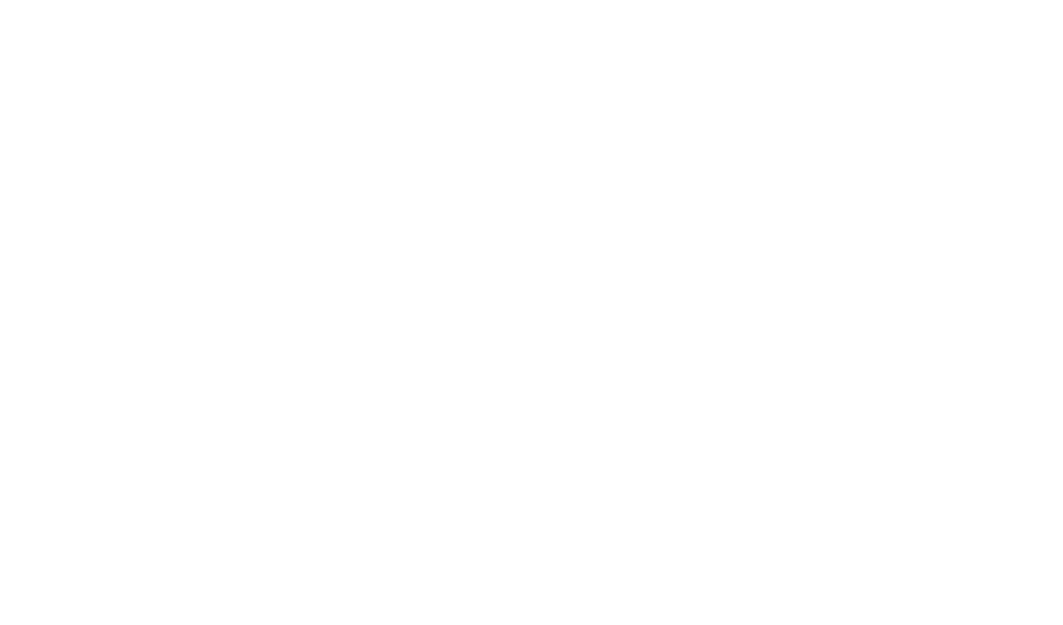

In [17]:
#for some reason this cell needs to be run manually, the graph will not appear
#by restarting and running all automatically and needs to be run twice for the
#x-axis tick label size to be adjusted

%matplotlib notebook
import matplotlib.pyplot as plt
#show how many cases there are per month
months_strings = ['August','September','October','November','December','January'
                 ,'February', 'March', 'April', 'May','June','July']
x_axis = months_strings
y_axis = ordered_month_list
#print(month_list)

plt.figure(figsize=(8.5,5))
graph = plt.bar(x_axis,y_axis)
#graph = plt.gcf()
plt.xlabel("Months", fontsize=12)
plt.ylabel("Case Numbers in Millions",fontsize=12)
plt.title('Cases by Month')
plt.rc('xtick', labelsize = 7)
plt.tight_layout
#graph = plt.set_size_inches(14,10)
plt.show()
plt.savefig('./Resources/CA_cases_by_county/Images/total_cases_by_month.png')




In [18]:
#leave this three part graph for tutoring tomorrow


# make smaller dataframes for each demographic with county, case month, current_status,
# and demographic in the individual dataframes

age_df = ca_cases_aug20_on[['age_group','month', 'res_county']]

#make a smaller dataframe with the cases numbers by age group by month

age_month_df = pd.DataFrame(age_df, columns=['age_group','month'])
age_group_cases_monthly = age_month_df.groupby(['month', 'age_group']).size()                       
age_group_cases_monthly_df = age_group_cases_monthly.to_frame(name='cases')
#indexMissing = age_group_cases_monthly_df[age_group_cases_monthly_df['age_group'] == 'Missing'].index
#age_group_cases_monthly_df.drop(indexMissing, inplace=True)
age_group_cases_monthly_df = age_group_cases_monthly_df.reset_index()


#drop the rows with missing age values
indexMissing = age_group_cases_monthly_df[age_group_cases_monthly_df['age_group'] == 'Missing'].index
age_group_cases_monthly_df.drop(indexMissing, inplace=True)
age_group_cases_monthly_df

#grouped_by_month = ca_cases_aug20_on.groupby(['month','res_county']).size()
#grouped_by_2021_month_df = grouped_by_month.to_frame(name = 'cases')
#grouped_by_2021_month_df.to_csv('''./Resources/CA_cases_by_county/
#                                cases_by_county_and_month_2021.csv''')

,month,age_group,cases
0,August,0 - 17 years,19308
1,August,18 to 49 years,88475
2,August,50 to 64 years,27392
3,August,65+ years,15501
5,September,0 - 17 years,12285
6,September,18 to 49 years,59664
7,September,50 to 64 years,18436
8,September,65+ years,9810
10,October,0 - 17 years,15844
11,October,18 to 49 years,72037


In [28]:
%matplotlib notebook







<IPython.core.display.Javascript object>


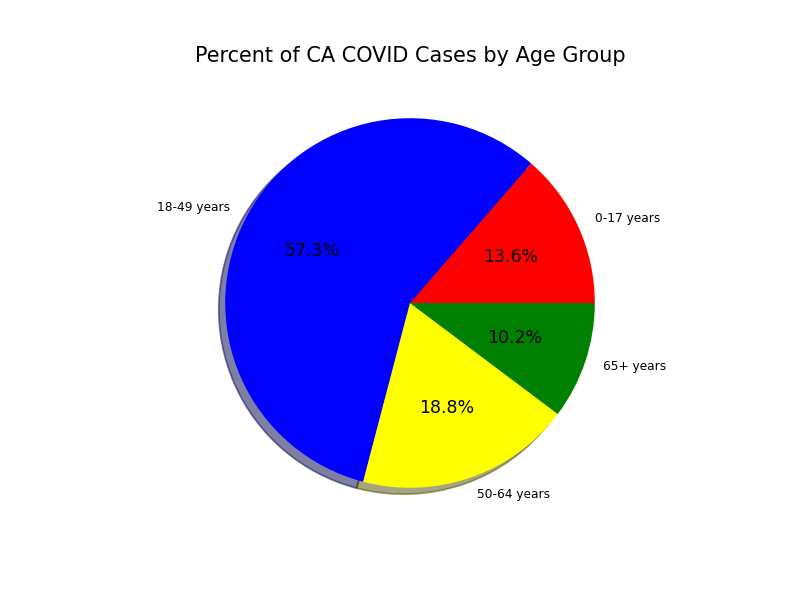

In [41]:
#do pie chart for age
%matplotlib notebook
import matplotlib.pyplot as plt
labels = ['0-17 years', '18-49 years','50-64 years','65+ years'] 
age_cases = [455570,1916866,629910,342849] 
colors = ['red','blue','yellow','green']
plt.title('Percent of CA COVID Cases by Age Group')
plt.pie(age_cases, labels=labels, colors=colors,  autopct="%1.1f%%", shadow = True)
plt.show()

plt.savefig('./Resources/CA_cases_by_county/Images/pie_chart_ages.png')

<IPython.core.display.Javascript object>


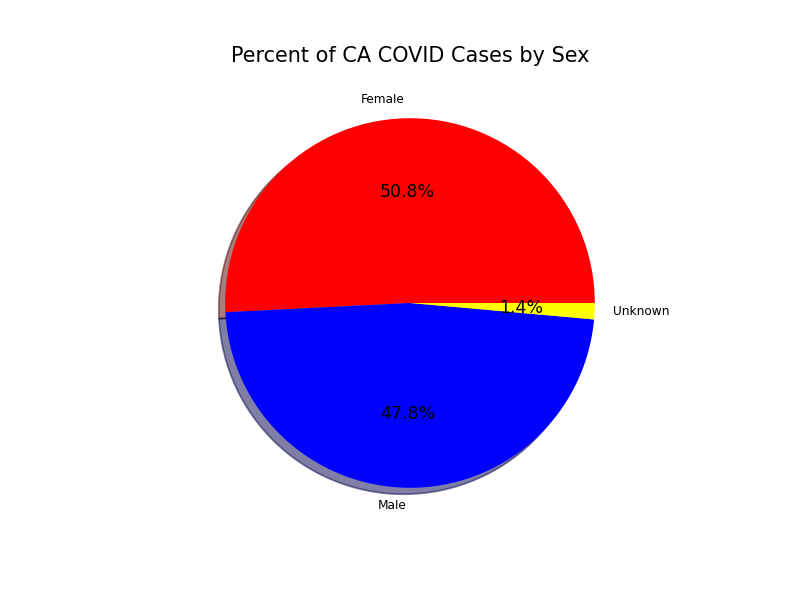

In [40]:
#make pie chart and dataframe for sex and cases
%matplotlib notebook
sex_df = ca_cases_aug20_on[['sex','month', 'res_county']]
sex_df.head(3)
labels = ['Female','Male','Unknown']
sex_cases = [1696862,1596324,47378]
colors = ['red','blue','yellow']
plt.pie(sex_cases,labels=labels,colors=colors,shadow=True,autopct="%1.1f%%")
plt.title('Percent of CA COVID Cases by Sex')
plt.savefig('./Resources/CA_cases_by_county/Images/pie_chart_sex.png')
#sex_counts = ca_cases_aug20_on['sex'].value_counts()
#print(sex_counts)


<IPython.core.display.Javascript object>


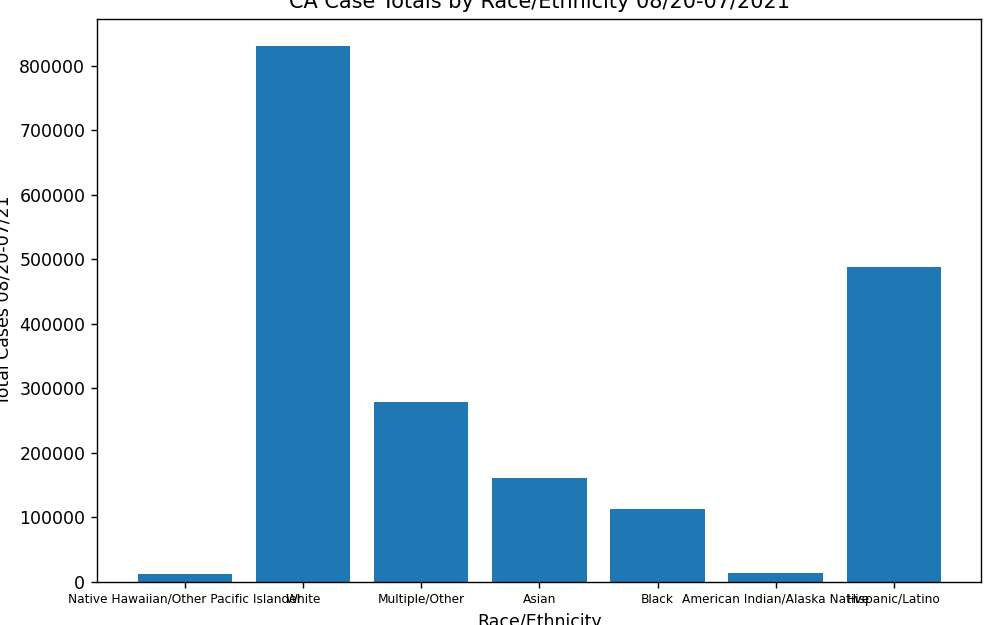

In [39]:
#charts for known race/ethnicity and cases info. Not including unknown/null values.
#ethnicity is only Hispanic/non-Hispanic so I am including it here.
%matplotlib notebook

race_df = ca_cases_aug20_on[['race','month', 'res_county']]
race_df.head(3)
labels = ['Native Hawaiian/Other Pacific Islander','White', 'Multiple/Other', 'Asian', 'Black', 'American Indian/Alaska Native', 
           'Hispanic/Latino']
race_ethnicity_cases = [12476,831768,278682,161342,112558,13803,488283]
plt.figure(figsize=(8,5))
plt.bar(labels,race_ethnicity_cases)
plt.tight_layout()
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Cases 08/20-07/21')
plt.title('CA Case Totals by Race/Ethnicity 08/20-07/2021')
plt.show()
#race_counts = ca_cases_aug20_on['race'].value_counts()
#print(race_counts)
#ethnicity_counts = ca_cases_aug20_on['ethnicity'].value_counts()
#print(ethnicity_counts)
plt.savefig('./Resources/CA_cases_by_county/Images/pie_chart_race_ethnicity.png')